----------------------------------------------
Import dataset and necessary libraries
----------------------------------------------
----------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from scipy.stats import loguniform
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

df_heart = pd.read_csv("Medicaldataset.csv")

print(f"Number of columns: {df_heart.shape[1]}")
print(f"Number of rows: {df_heart.shape[0]}")

pd.set_option('display.width', 1000)
print(df_heart.head())

Number of columns: 9
Number of rows: 1319
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result
0   64       1          66                      160                        83        160.0   1.80     0.012  negative
1   21       1          94                       98                        46        296.0   6.75     1.060  positive
2   55       1          64                      160                        77        270.0   1.99     0.003  negative
3   64       1          70                      120                        55        270.0  13.87     0.122  positive
4   55       1          64                      112                        65        300.0   1.08     0.003  negative


----------------------------------------------
Verifying data types
----------------------------------------------
----------------------------------------------

In [2]:
print("Data Types:")
print(df_heart.info())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


----------------------------------------------
Mapping the target variable to the classification model
----------------------------------------------
----------------------------------------------

In [3]:
df_heart["Result"] = df_heart["Result"].map({"positive": 1, "negative": 0})

pd.set_option('display.width', 1000)
print(df_heart.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result
0   64       1          66                      160                        83        160.0   1.80     0.012       0
1   21       1          94                       98                        46        296.0   6.75     1.060       1
2   55       1          64                      160                        77        270.0   1.99     0.003       0
3   64       1          70                      120                        55        270.0  13.87     0.122       1
4   55       1          64                      112                        65        300.0   1.08     0.003       0


----------------------------------------------
Distribution of attributes
----------------------------------------------
----------------------------------------------

Original distributions:


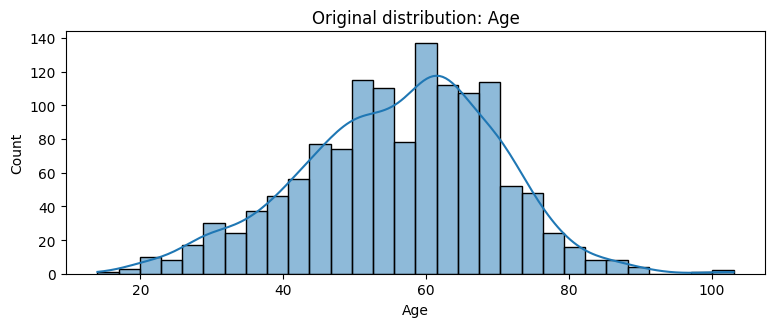

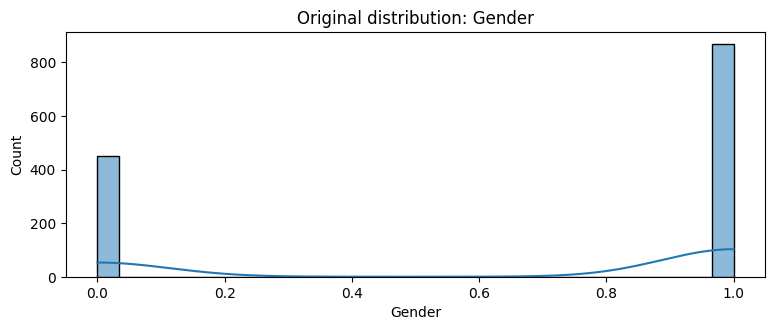

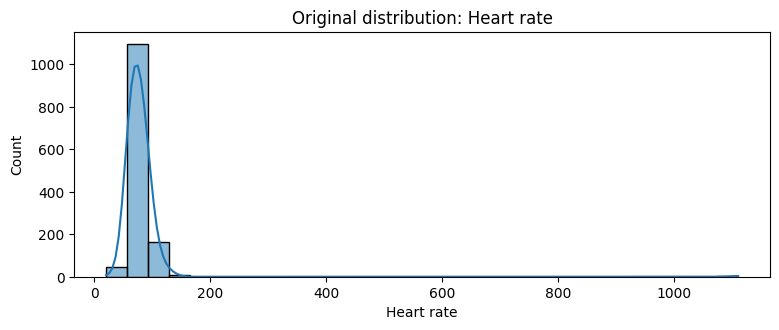

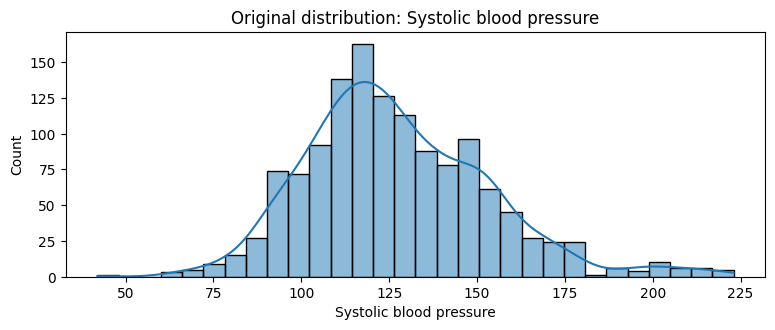

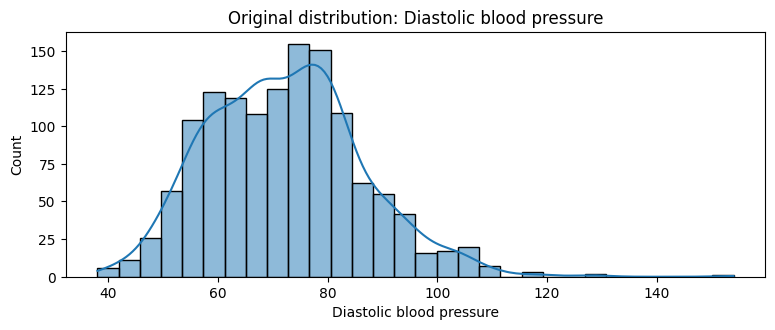

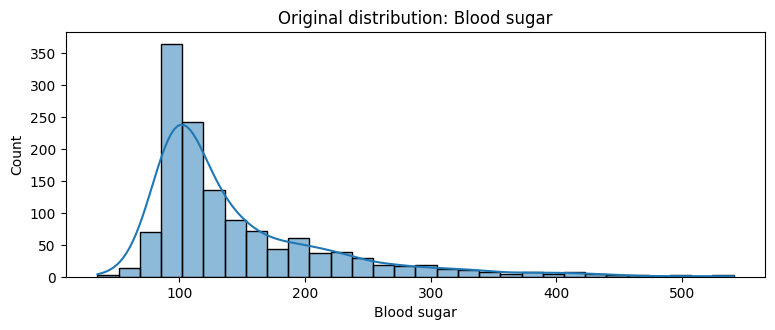

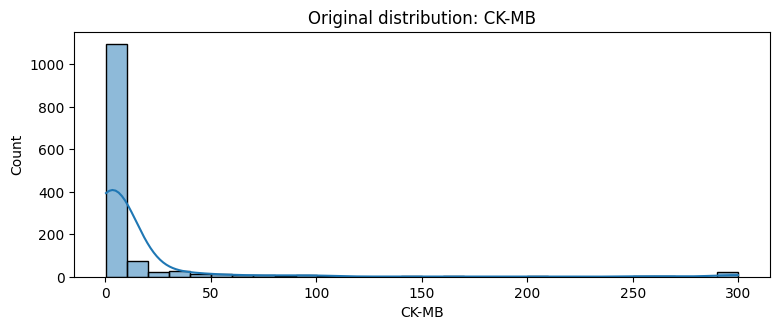

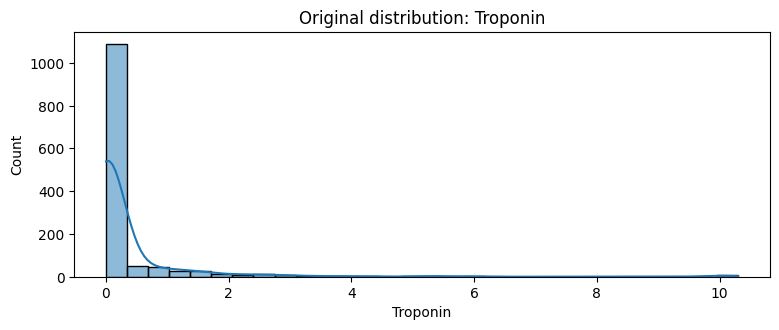

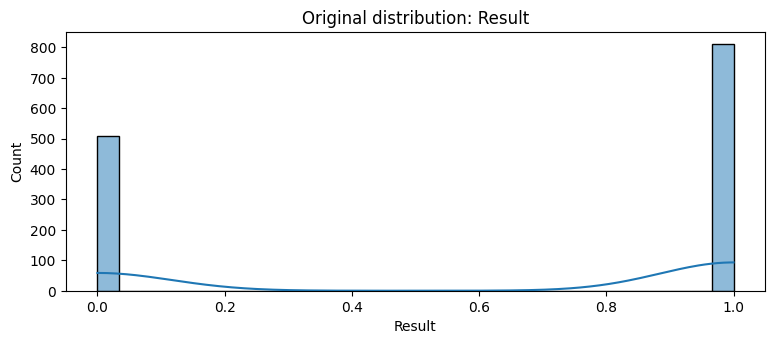

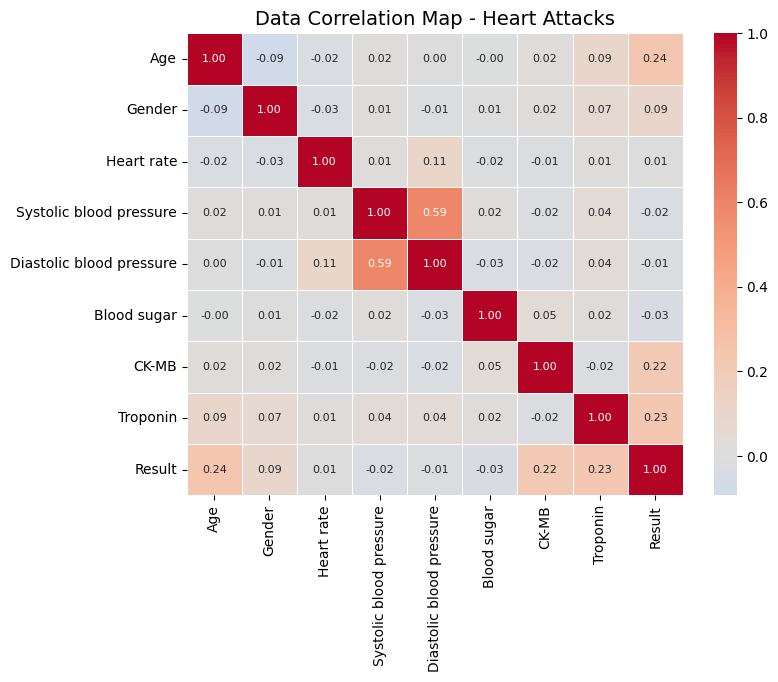

In [4]:
# Filter only numeric columns
numeric_cols = df_heart.select_dtypes(include=[np.number]).columns.tolist()

# Plot the original distributions
print("Original distributions:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    plt.title(f'Original distribution: {col}')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Heart Attacks", fontsize=14)
plt.show()

----------------------------------------------
Attribute transformations
----------------------------------------------
----------------------------------------------

Winsorize applied in column: Heart rate
Winsorize applied in column: CK-MB
Winsorize applied in column: Troponin
Winsorize applied in column: Diastolic blood pressure
Winsorize applied in column: Blood sugar


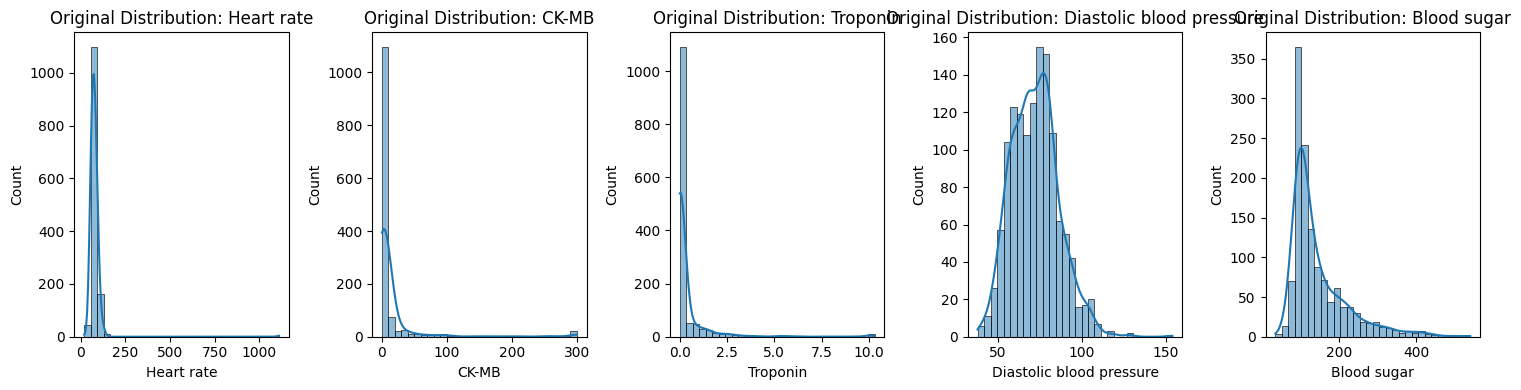

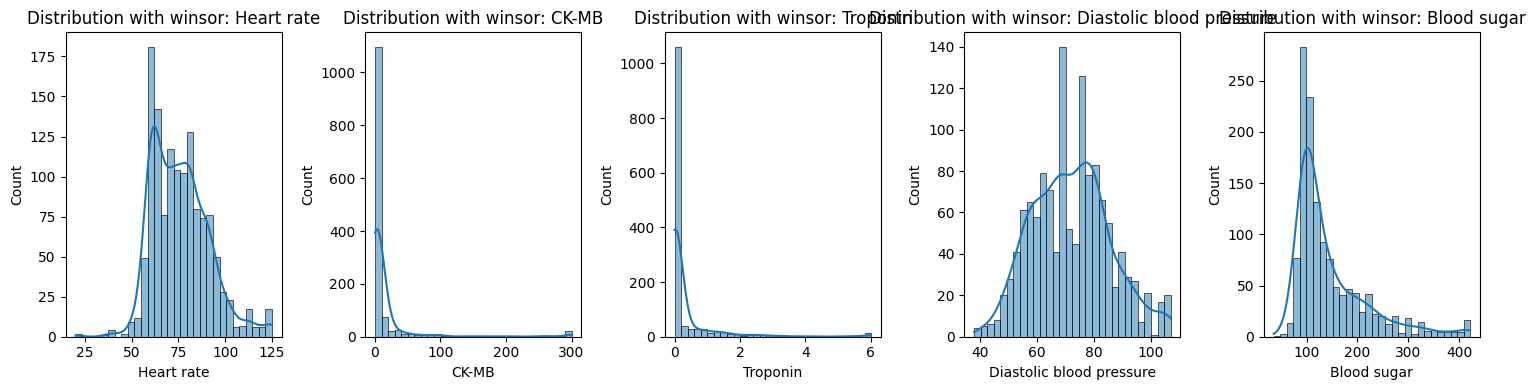

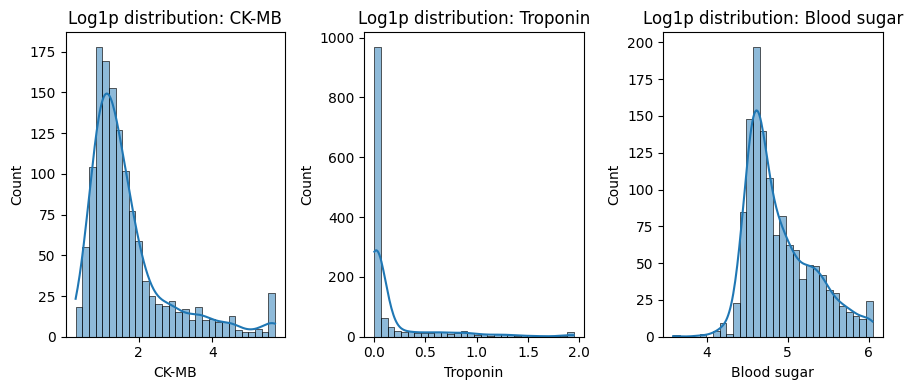

In [5]:
# Columns to transform
cols_log = ['Heart rate', 'CK-MB', 'Troponin', 'Diastolic blood pressure', 'Blood sugar']

# Apply winsorize
df_heart_winsor = df_heart.copy()
for col in cols_log:
    col_data = df_heart[col].values
    winsorized_data = winsorize(col_data, limits=[0.0, 0.01])
    df_heart_winsor[col] = winsorized_data
    print(f"Winsorize applied in column: {col}")

# Plot original distributions (after winsorizing)
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart[col], kde=True, bins=30)
    plt.title(f'Original Distribution: {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_winsor[col], kde=True, bins=30)
    plt.title(f'Distribution with winsor: {col}')
plt.tight_layout()
plt.show()

cols_log = ['CK-MB', 'Troponin', 'Blood sugar']

# Apply logarithmic transformation
df_heart_winsor_log = df_heart_winsor.copy()
for col in cols_log:
    df_heart_winsor_log[col] = np.log1p(df_heart_winsor_log[col])

# Plotting distributions after log1p
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_winsor_log[col], kde=True, bins=30)
    plt.title(f'Log1p distribution: {col}')
plt.tight_layout()
plt.show()

----------------------------------------------
Distributions after transformations
----------------------------------------------
----------------------------------------------

Final distributions:


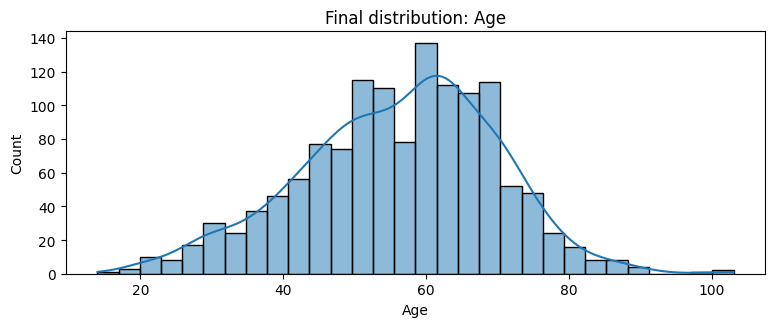

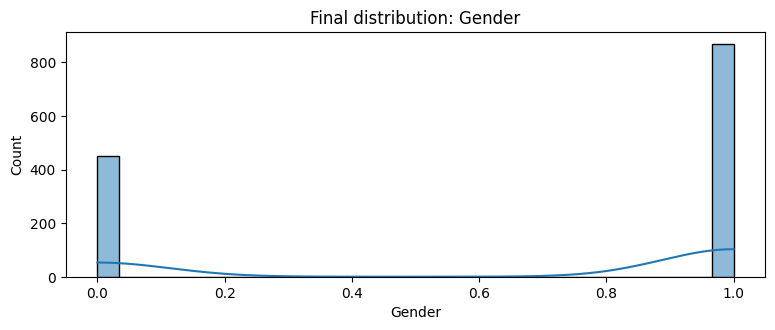

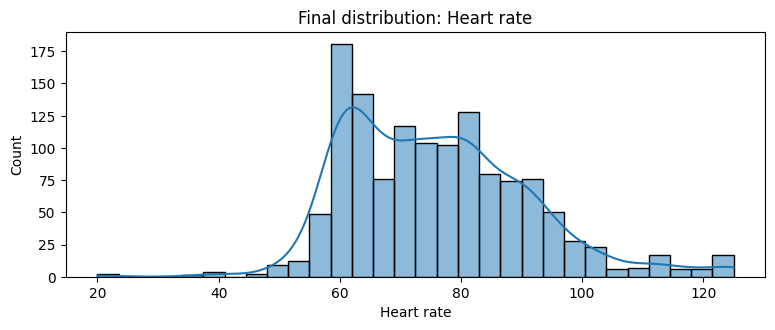

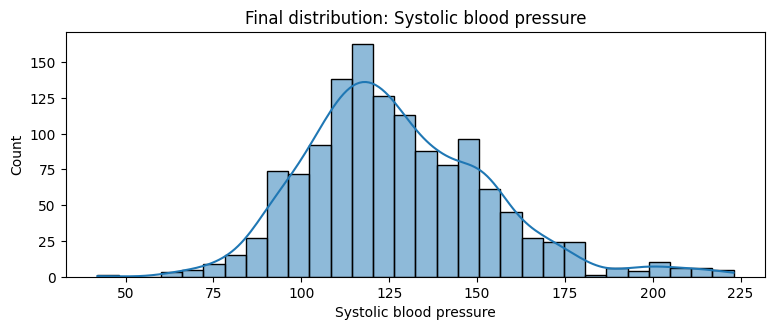

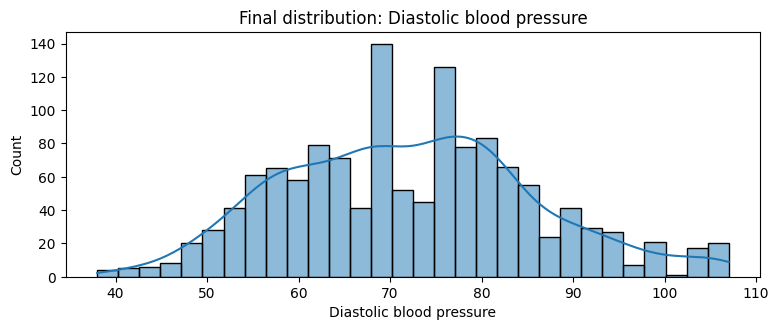

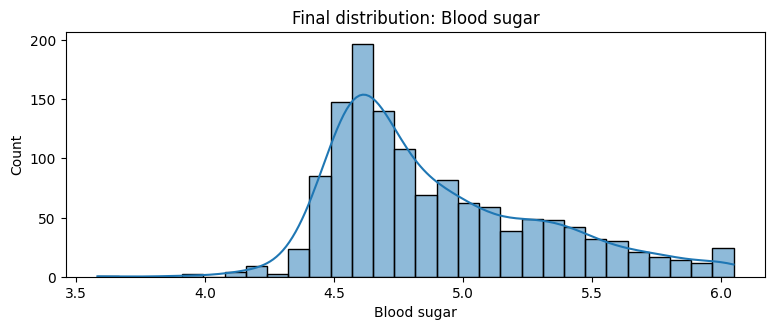

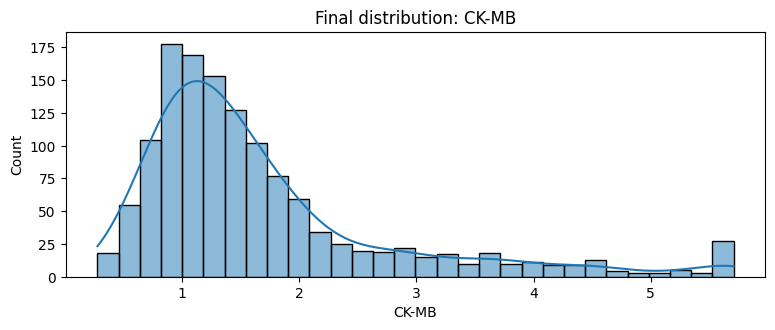

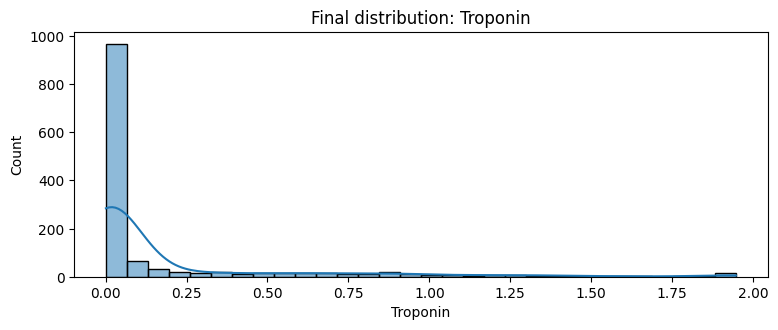

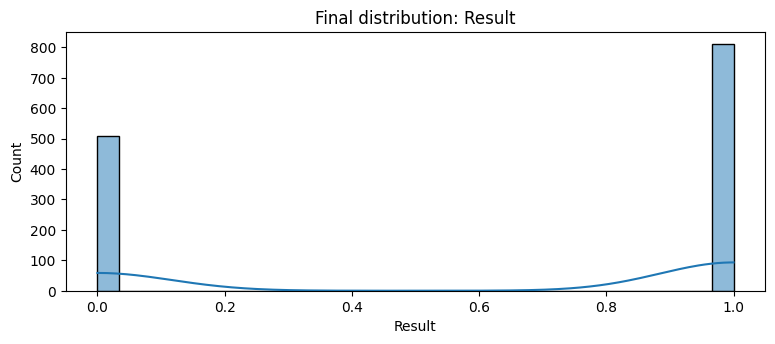

In [6]:
# Graficar las distribuciones despues de transformaciones
print("Final distributions:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart_winsor_log[col], kde=True, bins=30)
    plt.title(f'Final distribution: {col}')
    plt.tight_layout()
    plt.show()

----------------------------------------------
Most relevant attributes
----------------------------------------------
----------------------------------------------

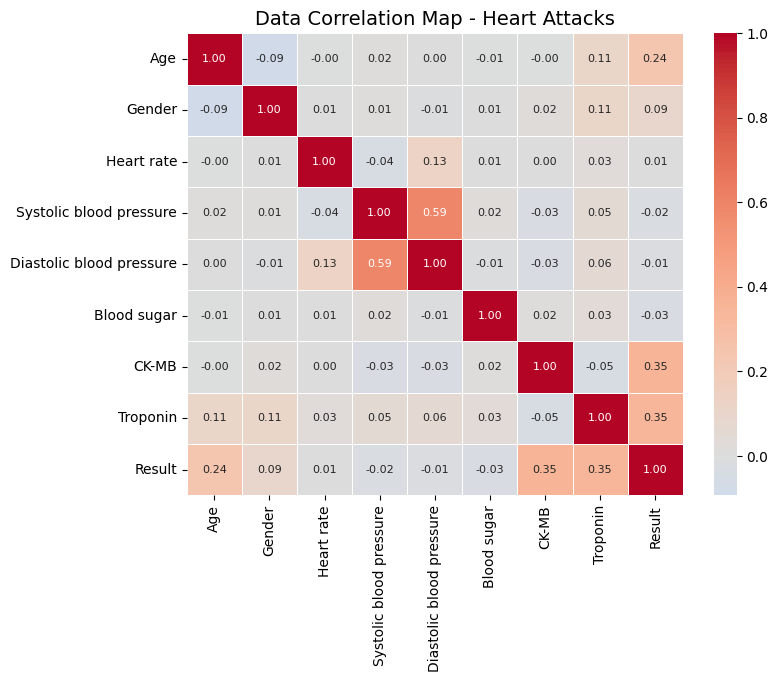

In [7]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_winsor_log.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Heart Attacks", fontsize=14)
plt.show()

C:\Users\axelr\AppData\Local\Temp\ipykernel_32724\3914616619.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Attribute', palette='viridis')


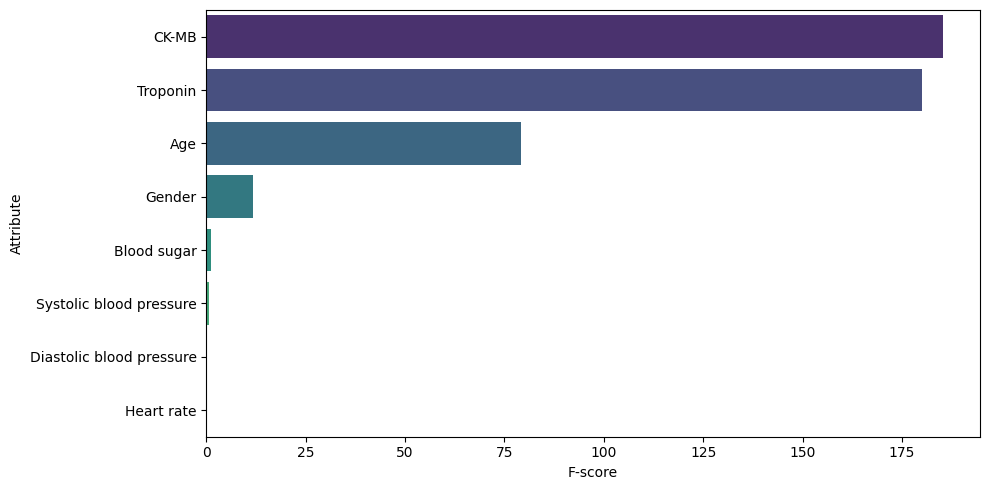

,Attribute,F-score (ANOVA),p-value
6,CK-MB,185.327626,1.386361e-39
7,Troponin,180.106986,1.389282e-38
0,Age,79.147830,1.861645e-18
1,Gender,11.849969,5.946979e-04
5,Blood sugar,1.228483,2.679046e-01
3,Systolic blood pressure,0.571406,4.498359e-01
4,Diastolic blood pressure,0.184435,6.676599e-01
2,Heart rate,0.035493,8.505951e-01


In [8]:
X = df_heart_winsor_log.drop(columns=['Result']) 
y = df_heart_winsor_log['Result']

# Aplicar SelectKBest con ANOVA F-score
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Resultados en Dataframe
anova_scores = pd.DataFrame({
    'Attribute': X.columns,
    'F-score (ANOVA)': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-score (ANOVA)', ascending=False)

# Grafica de resultados
plt.figure(figsize=(10, 5))
sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Attribute', palette='viridis')
#plt.title('Importance of attributes according to ANOVA F-score')
plt.xlabel('F-score')
plt.ylabel('Attribute')
plt.tight_layout()
plt.show()

anova_scores

----------------------------------------------
Selection of the Most Relevant Attributes
----------------------------------------------
----------------------------------------------

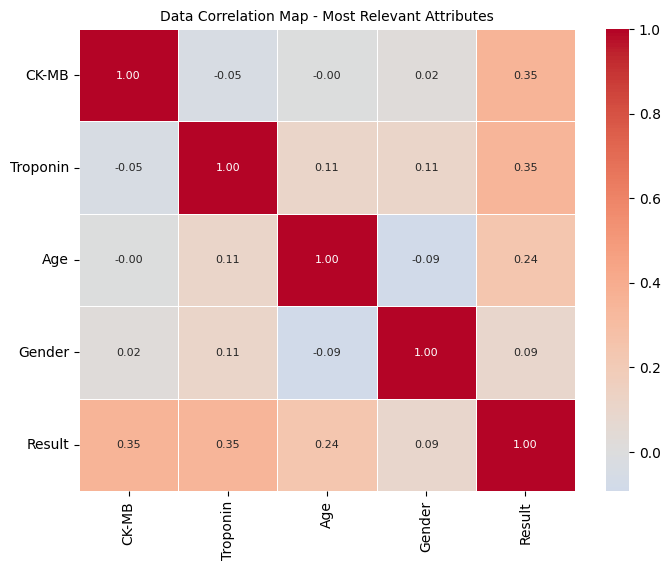

In [9]:
relevant_attributes = ['CK-MB', 'Troponin', 'Age', 'Gender', 'Result']
df_heart_winsor_log_filt = df_heart_winsor_log[relevant_attributes]

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_winsor_log_filt.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Data Correlation Map - Most Relevant Attributes", fontsize=10)
plt.show()

----------------------------------------------
Dataset splitting and data normalization
----------------------------------------------
----------------------------------------------

In [10]:
attribute = 'Result'
X = df_heart_winsor_log_filt.drop(columns=[attribute])
Y = df_heart_winsor_log_filt.Result

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=16)
print(X)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("Split and normalized dataset")

joblib.dump(scaler, 'model_standardscaler.pkl')
print("Modelo exportado correctamente.")

         CK-MB  Troponin  Age  Gender
0     1.029619  0.011929   64       1
1     2.047693  0.722706   21       1
2     1.095273  0.002996   55       1
3     2.699346  0.115113   64       1
4     0.732368  0.002996   55       1
...        ...       ...  ...     ...
1314  0.966984  0.005982   44       1
1315  0.845868  0.158712   66       1
1316  0.806476  1.658228   45       1
1317  1.916923  0.306749   54       1
1318  3.949126  1.018847   51       1

[1319 rows x 4 columns]
Split and normalized dataset
Modelo exportado correctamente.


----------------------------------------------
Hyperparameter Tuning
----------------------------------------------
----------------------------------------------

In [ ]:
# Grid Search
# Logistic Regression Model
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # Controls the penalty applied to coefficient sizes; higher values mean less regularization
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms for logistic regression
    'max_iter': [100, 200, 300, 500, 1000],  # Maximum number of iterations for convergence
    'class_weight': [None, 'balanced'],  # Handling imbalanced classes
    'penalty': ['l2']  # Type of regularization to apply; l2 is Ridge regularization
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=1000),  # Base model for Logistic Regression
    param_grid=param_grid_log,  # Hyperparameters to evaluate
    scoring='accuracy',  # Metric to use for evaluating model performance
    cv=10,  # Number of folds for cross-validation (10 folds)
    n_jobs=-1,  # Use all available cores for processing
    verbose=1  # Show GridSearch progress
)

print("Grid Search: Logistic Regression")
grid_log.fit(X_train_norm, Y_train)
print("Best parameters:", grid_log.best_params_)
print("Best score:", grid_log.best_score_)  # Ensure the best score is printed
best_log_model_grid = grid_log.best_estimator_
joblib.dump(best_log_model_grid, 'best_log_model_grid.pkl')
print("Model exported.")

# Naive Bayes Model
param_grid_naive = {
    'var_smoothing': list(np.logspace(-15, -5, 15)) + list(np.logspace(-11, -5, 10)) + [1e-9, 1e-8, 1e-7, 1e-6],  # Variance smoothing
    'priors': [None, [0.3, 0.7], [0.5, 0.5]]  # Example for binary classification
}

grid_search_naive = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_naive,
    scoring='accuracy',
    cv=10,  # Ensure 10 folds
)

print("\nGrid Search: Naive Bayes")
grid_search_naive.fit(X_train_norm, Y_train)
print("Best hyperparameters:", grid_search_naive.best_params_)
print("Best score:", grid_search_naive.best_score_)
best_naive_model_grid = grid_search_naive.best_estimator_
joblib.dump(best_naive_model_grid, 'best_naive_model_grid.pkl')
print("Model exported.")

# KNN Model
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 21, 23, 25, 27, 29, 31],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function (uniform or distance-based)
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming', 'braycurtis']  # Distance metrics
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=10,  # 10 folds
)
print("\nGrid Search: KNN")
grid_search_knn.fit(X_train_norm, Y_train)
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)
best_knn_model_grid = grid_search_knn.best_estimator_
joblib.dump(best_knn_model_grid, 'best_knn_model_grid.pkl')
print("Model exported.")

# SVM Model
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Parameter for RBF kernel
    'degree': [3, 4, 5],  # Only applies if kernel = 'poly'
    'class_weight': [None, 'balanced']
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=10, scoring='accuracy')  # 10 folds
grid_search_svm.fit(X_train_norm, Y_train)
print("\nGrid Search: SVM")
print("Best hyperparameters:", grid_search_svm.best_params_)
print("Best score:", grid_search_svm.best_score_)
best_svm_model_grid = grid_search_svm.best_estimator_
joblib.dump(best_svm_model_grid, 'best_svm_model_grid.pkl')
print("Model exported.")

# Decision Tree Model
param_grid_tree = {
    'max_depth': [2, 3, 4, 5, 10, 20, None],  # Maximum tree depth
    'min_samples_split': [2, 3, 4, 5, 6, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],  # Minimum samples per leaf
    'max_features': [None, 'sqrt', 'log2'],  # Maximum features to consider at each split
    'criterion': ['gini', 'entropy'],  # Criterion to split nodes
    'class_weight': [None, 'balanced'],  # For handling imbalanced classes
    'splitter': ['best', 'random'],
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, cv=10, scoring='accuracy')  # 10 folds
grid_search_tree.fit(X_train_norm, Y_train)
print("\nGrid Search: Decision Trees")
print("Best hyperparameters:", grid_search_tree.best_params_)
print("Best score:", grid_search_tree.best_score_)
best_tree_model_grid = grid_search_tree.best_estimator_
joblib.dump(best_tree_model_grid, 'best_tree_model_grid.pkl')
print("Model exported.")

# Multilayer Perceptron Model
param_grid_mlp = {
    'hidden_layer_sizes': [(10), (50), (100), (10, 50), (50, 100), (100, 50), (50, 50), (10, 10, 10), (150, 75)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(
    MLPClassifier(max_iter=1000),  # Base model for MLP
    param_grid=param_grid_mlp,  # Hyperparameters to evaluate
    scoring='accuracy',  # Metric to use for evaluating model performance
    cv=10,  # Number of folds for cross-validation (10 folds)
    n_jobs=-1,  # Use all available cores for processing
    verbose=1  # Show GridSearch progress
)

print("\nGrid Search: MLP")
grid_mlp.fit(X_train_norm, Y_train)
print("Best parameters:", grid_mlp.best_params_)
print("Best score:", grid_mlp.best_score_)  # Ensure the best score is printed
best_mlp_model_grid = grid_mlp.best_estimator_
joblib.dump(best_mlp_model_grid, 'best_mlp_model_grid.pkl')
print("Model exported.")

Grid Search: Logistic Regression
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


Best parameters: {'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.8710152740341421
Model exported.

Grid Search: Naive Bayes
Best hyperparameters: {'priors': [0.3, 0.7], 'var_smoothing': np.float64(1e-15)}
Best score: 0.7923809523809524
Model exported.

Grid Search: KNN
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best score: 0.8492452830188679
Model exported.

Grid Search: SVM
Best hyperparameters: {'C': 100, 'class_weight': None, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Best score: 0.963045822102426
Model exported.

Grid Search: Decision Trees
Best hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
Best score: 0.9924168912848158
Model exported.

Grid Search: MLP
Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters: {'activation': 'relu', 'alpha'

----------------------------------------------
Results with test data
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.897727   0.901313  0.897727  0.898457
Naive Bayes          0.734848   0.837301  0.734848  0.733295
KNN                  0.814394   0.844948  0.814394  0.816974
SVM                  0.946970   0.949441  0.946970  0.947313
Decision Tree        0.988636   0.988645  0.988636  0.988625
MLP                  0.958333   0.959403  0.958333  0.958512


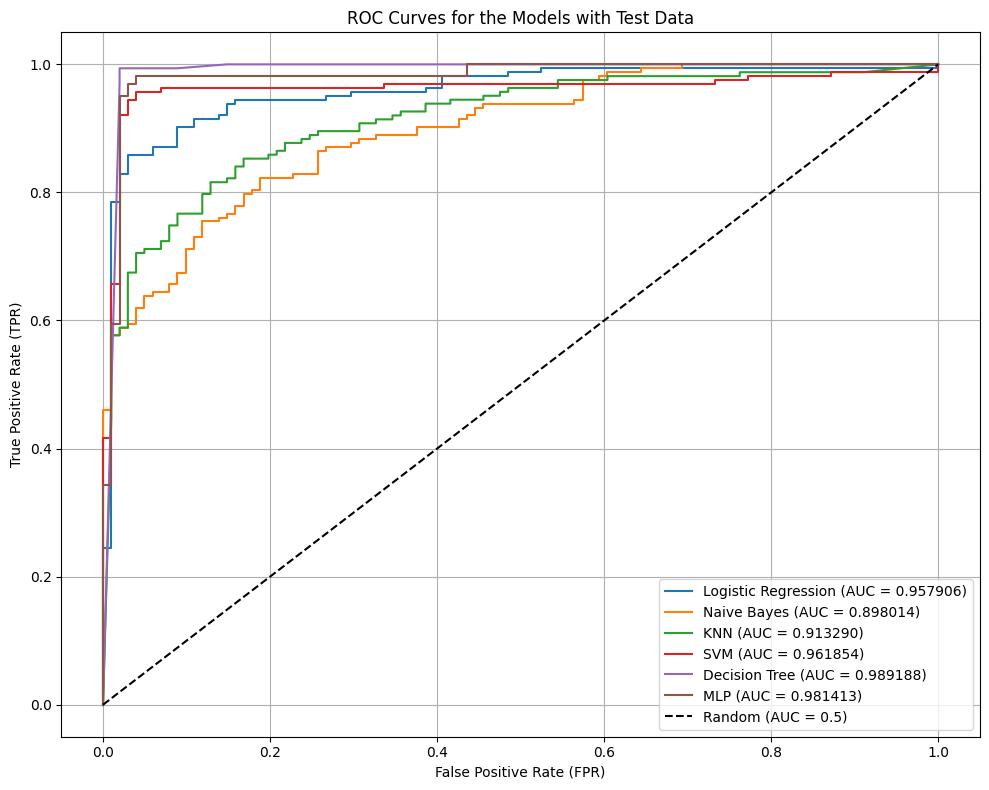

In [12]:
# Dictionary with the models to evaluate
models = {
    "Logistic Regression": joblib.load("best_log_model_grid.pkl"),
    "Naive Bayes": joblib.load("best_naive_model_grid.pkl"),
    "KNN": joblib.load("best_knn_model_grid.pkl"),
    "SVM": joblib.load("best_svm_model_grid.pkl"),
    "Decision Tree": joblib.load("best_tree_model_grid.pkl"),
    "MLP": joblib.load("best_mlp_model_grid.pkl")
}

# Create a dictionary to store metrics
metrics = {}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test_norm)

    # Save metrics
    metrics[name] = {
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, average='weighted'),
        "Recall": recall_score(Y_test, y_pred, average='weighted'),
        "F1-score": f1_score(Y_test, y_pred, average='weighted')
    }

# Display metrics in table format
df_metrics = pd.DataFrame(metrics).T
print(df_metrics)

# ROC curves

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_norm)[:, 1]
    else:
        y_scores = model.decision_function(X_test_norm)

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.6f})")

# Random curve
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.title('ROC Curves for the Models with Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
Results with train data
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.876777   0.928690  0.865533  0.896000
Naive Bayes          0.779147   0.979167  0.653787  0.784059
KNN                  1.000000   1.000000  1.000000  1.000000
SVM                  0.969668   0.988871  0.961360  0.974922
Decision Tree        0.993365   0.993827  0.995363  0.994595
MLP                  0.981043   0.996830  0.972179  0.984351


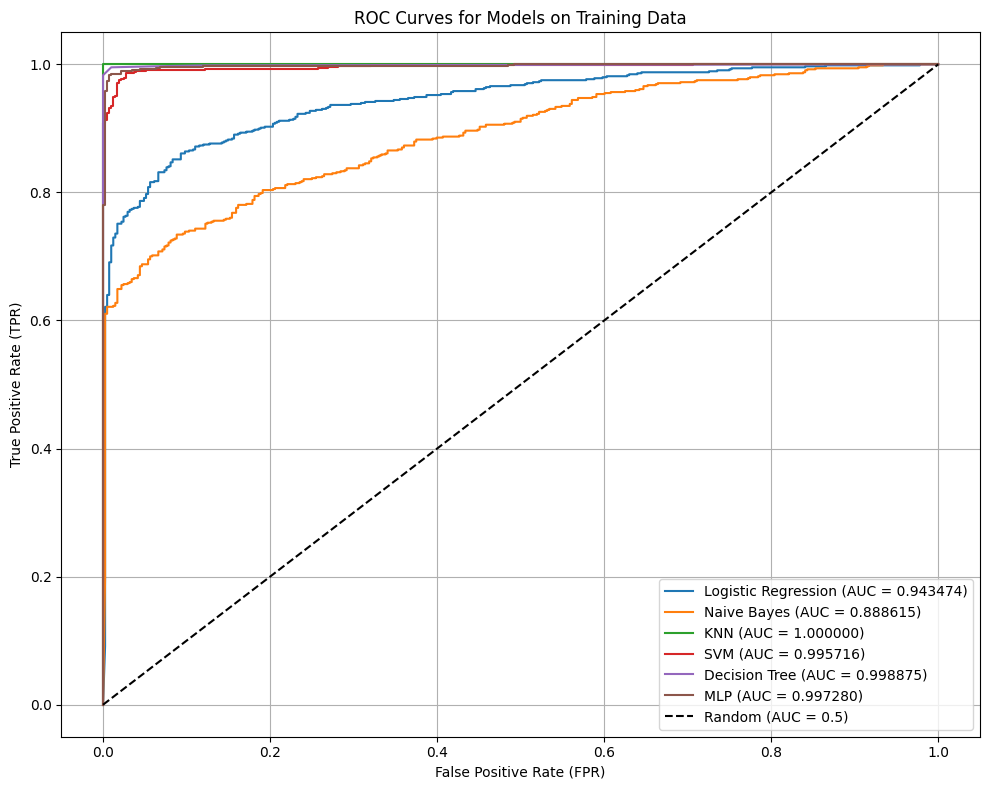

In [13]:
# Create a dictionary to store training metrics
training_metrics = {}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_train_norm)

    # Save metrics
    training_metrics[name] = {
        "Accuracy": accuracy_score(Y_train, y_pred),
        "Precision": precision_score(Y_train, y_pred),
        "Recall": recall_score(Y_train, y_pred),
        "F1-score": f1_score(Y_train, y_pred)
    }

# Display metrics in table format
df_training_metrics = pd.DataFrame(training_metrics).T
print(df_training_metrics)

# ROC curves

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_train_norm)[:, 1]
    else:
        y_scores = model.decision_function(X_train_norm)

    fpr, tpr, _ = roc_curve(Y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.6f})")  # showing 5 decimal places

# Random curve
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.title('ROC Curves for Models on Training Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


----------------------------------------------
Ensemble Results (test data)
----------------------------------------------
----------------------------------------------


=== Evaluating XGB on TEST set ===
              precision    recall  f1-score   support

           0   0.961165  0.980198  0.970588       101
           1   0.987578  0.975460  0.981481       163

    accuracy                       0.977273       264
   macro avg   0.974371  0.977829  0.976035       264
weighted avg   0.977473  0.977273  0.977314       264



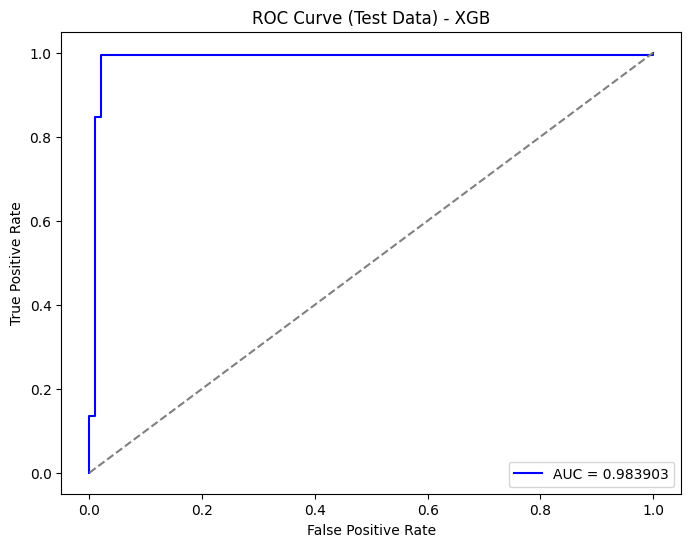


=== Evaluating DecisionTree on TEST set ===
              precision    recall  f1-score   support

           0   0.989691  0.950495  0.969697       101
           1   0.970060  0.993865  0.981818       163

    accuracy                       0.977273       264
   macro avg   0.979875  0.972180  0.975758       264
weighted avg   0.977570  0.977273  0.977181       264



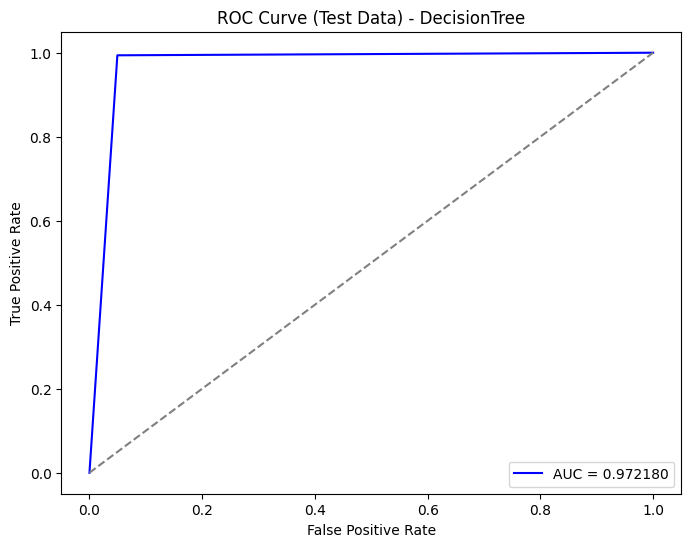


=== Evaluating LogisticRegression on TEST set ===
              precision    recall  f1-score   support

           0   0.970588  0.980198  0.975369       101
           1   0.987654  0.981595  0.984615       163

    accuracy                       0.981061       264
   macro avg   0.979121  0.980897  0.979992       264
weighted avg   0.981125  0.981061  0.981078       264



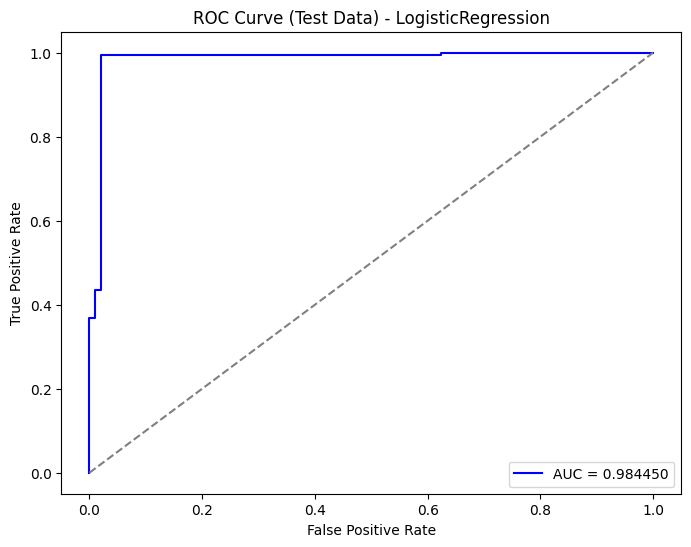


=== Evaluating RandomForest on TEST set ===
              precision    recall  f1-score   support

           0   0.990000  0.980198  0.985075       101
           1   0.987805  0.993865  0.990826       163

    accuracy                       0.988636       264
   macro avg   0.988902  0.987032  0.987950       264
weighted avg   0.988645  0.988636  0.988625       264



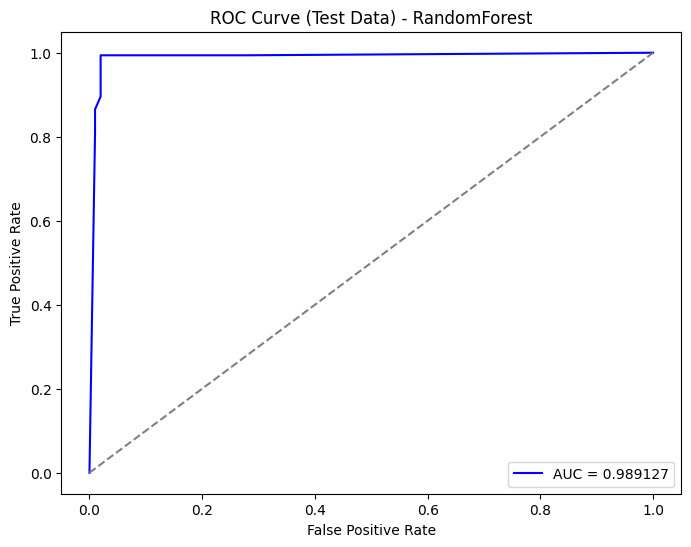


=== Evaluating GradientBoosting on TEST set ===
              precision    recall  f1-score   support

           0   0.990000  0.980198  0.985075       101
           1   0.987805  0.993865  0.990826       163

    accuracy                       0.988636       264
   macro avg   0.988902  0.987032  0.987950       264
weighted avg   0.988645  0.988636  0.988625       264



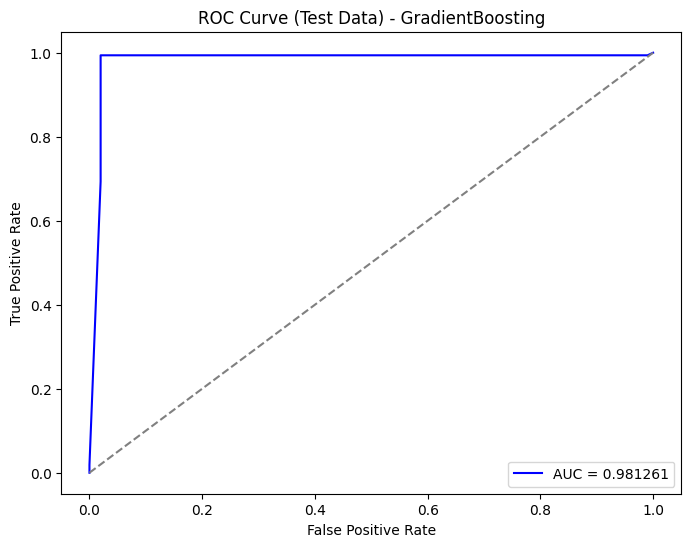


=== Evaluating VotingSoft on TEST set ===
              precision    recall  f1-score   support

           0   0.933962  0.980198  0.956522       101
           1   0.987342  0.957055  0.971963       163

    accuracy                       0.965909       264
   macro avg   0.960652  0.968627  0.964242       264
weighted avg   0.966920  0.965909  0.966055       264



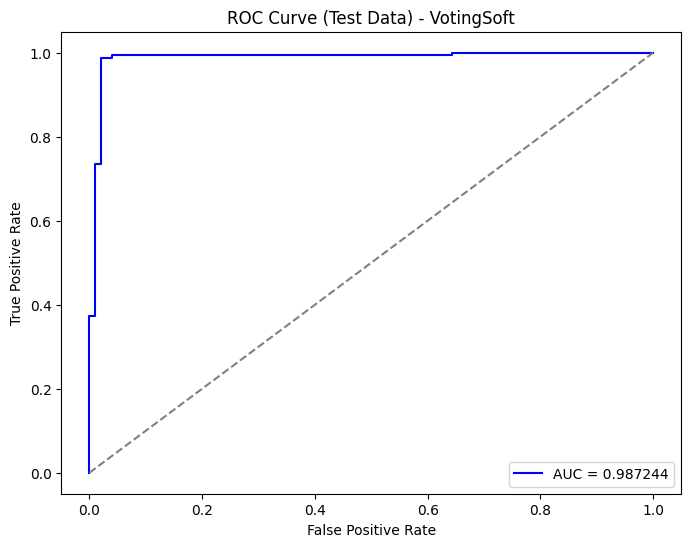

In [14]:
base_models = [
    ('Logistic Regression', LogisticRegression(C=100, max_iter=100, solver='liblinear')),
    # ('Naive Bayes', GaussianNB(priors=[0.3, 0.7], var_smoothing=np.float64(1e-15))),
    ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')),
    ('SVM', SVC(C=100, degree=3, gamma=1, kernel='poly', probability=True)),
    ('Decision Trees', DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)),
    ('Multilayer Perceptron', MLPClassifier(max_iter=1000, activation='relu', alpha=0.01, hidden_layer_sizes=(10, 50)))
]

meta_models = {
    'XGB': XGBClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'VotingSoft': VotingClassifier(estimators=base_models, voting='soft')
}

for name, meta_model in meta_models.items():
    if 'Voting' in name:
        model = meta_model
    else:
        model = StackingClassifier(cv=10, n_jobs=-1, estimators=base_models, final_estimator=meta_model, passthrough=True)
    
    print(f"\n=== Evaluating {name} on TEST set ===")
    model.fit(X_train_norm, Y_train)
    
    y_pred = model.predict(X_test_norm)
    print(classification_report(Y_test, y_pred, digits=6))
    
    y_proba = model.predict_proba(X_test_norm)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.6f}", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (Test Data) - {name}")
    plt.legend()
    plt.show()
    
    # Optional: Save model
    joblib.dump(model, f'ensemble_{name}_dataset1.pkl')

----------------------------------------------
Ensemble Results (train data)
----------------------------------------------
----------------------------------------------


=== Evaluating XGB on TRAIN set ===
              precision    recall  f1-score   support

           0   0.992611  0.987745  0.990172       408
           1   0.992296  0.995363  0.993827       647

    accuracy                       0.992417      1055
   macro avg   0.992453  0.991554  0.992000      1055
weighted avg   0.992418  0.992417  0.992414      1055



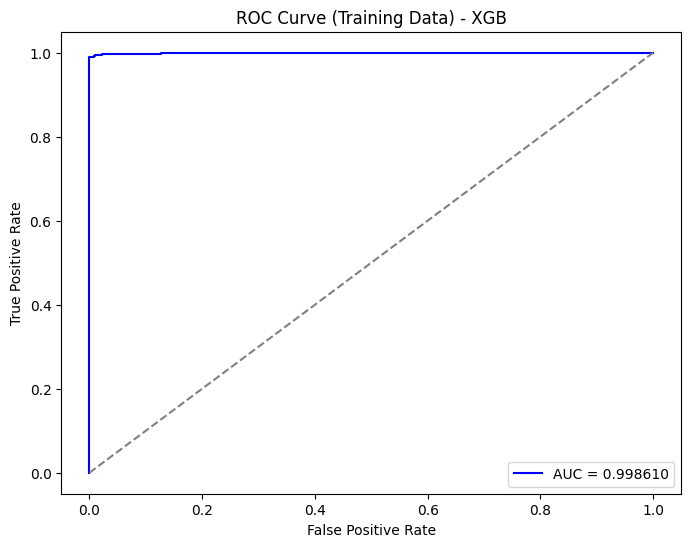


=== Evaluating DecisionTree on TRAIN set ===
              precision    recall  f1-score   support

           0   0.987835  0.995098  0.991453       408
           1   0.996894  0.992272  0.994578       647

    accuracy                       0.993365      1055
   macro avg   0.992364  0.993685  0.993015      1055
weighted avg   0.993391  0.993365  0.993369      1055



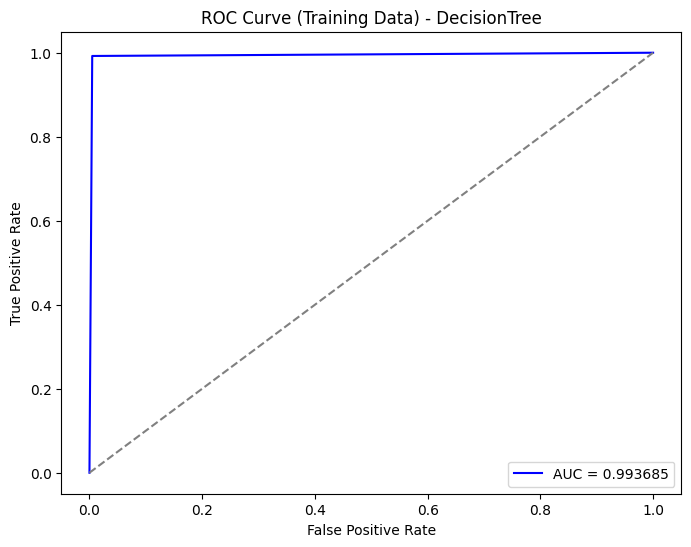


=== Evaluating LogisticRegression on TRAIN set ===
              precision    recall  f1-score   support

           0   0.992647  0.992647  0.992647       408
           1   0.995363  0.995363  0.995363       647

    accuracy                       0.994313      1055
   macro avg   0.994005  0.994005  0.994005      1055
weighted avg   0.994313  0.994313  0.994313      1055



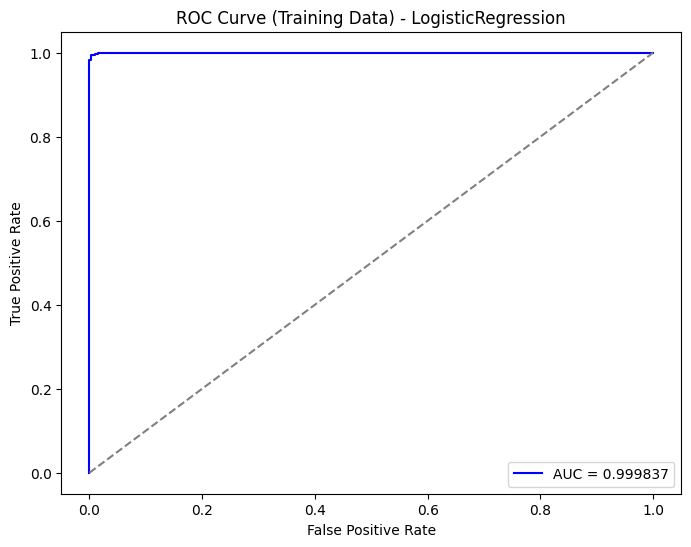


=== Evaluating RandomForest on TRAIN set ===
              precision    recall  f1-score   support

           0   0.995086  0.992647  0.993865       408
           1   0.995370  0.996909  0.996139       647

    accuracy                       0.995261      1055
   macro avg   0.995228  0.994778  0.995002      1055
weighted avg   0.995260  0.995261  0.995260      1055



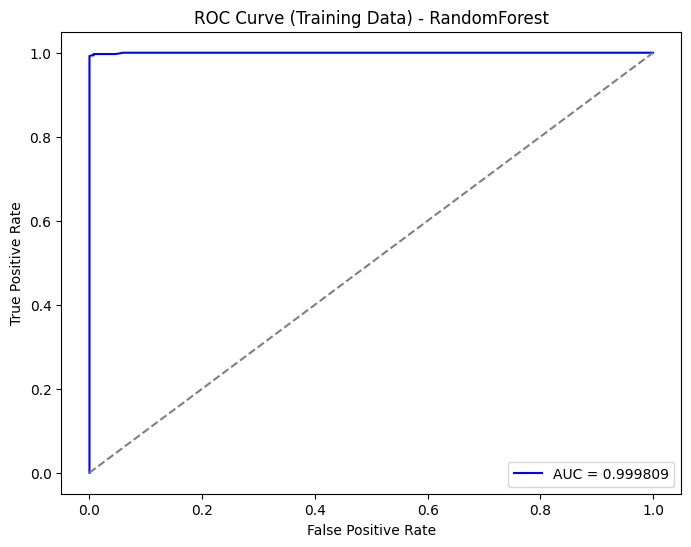


=== Evaluating GradientBoosting on TRAIN set ===
              precision    recall  f1-score   support

           0   0.995074  0.990196  0.992629       408
           1   0.993837  0.996909  0.995370       647

    accuracy                       0.994313      1055
   macro avg   0.994455  0.993552  0.994000      1055
weighted avg   0.994315  0.994313  0.994310      1055



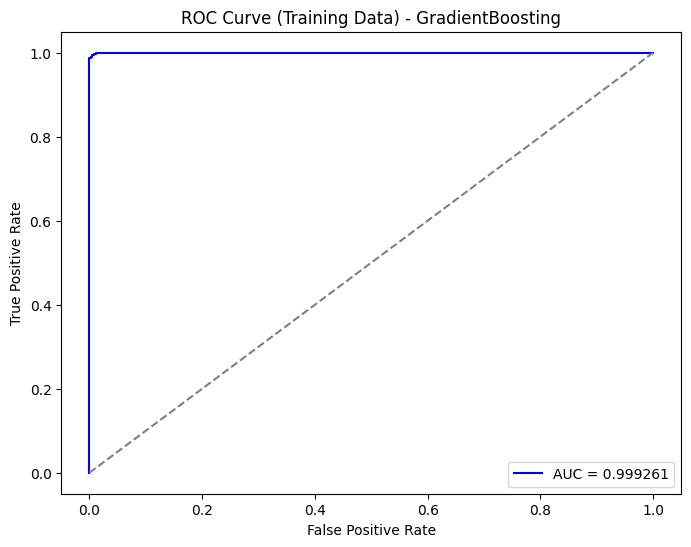


=== Evaluating VotingSoft on TRAIN set ===
              precision    recall  f1-score   support

           0   0.995098  0.995098  0.995098       408
           1   0.996909  0.996909  0.996909       647

    accuracy                       0.996209      1055
   macro avg   0.996003  0.996003  0.996003      1055
weighted avg   0.996209  0.996209  0.996209      1055



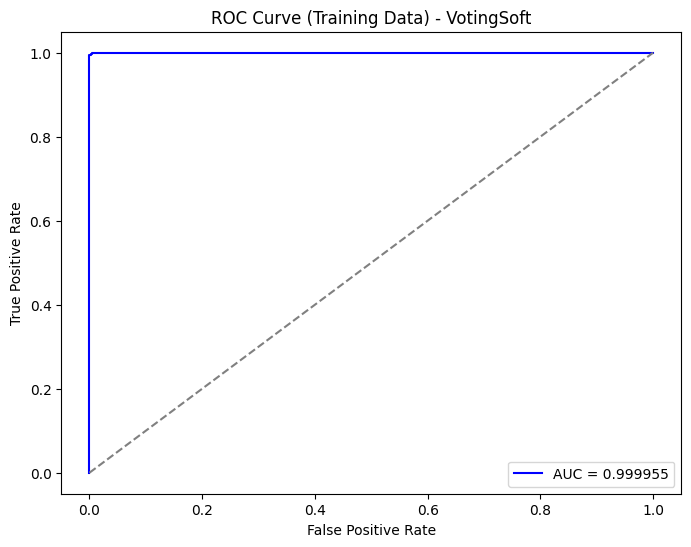

In [15]:
for name, meta_model in meta_models.items():
    if 'Voting' in name:
        model = meta_model
    else:
        model = StackingClassifier(cv=10, n_jobs=-1, estimators=base_models, final_estimator=meta_model, passthrough=True)
    
    print(f"\n=== Evaluating {name} on TRAIN set ===")
    model.fit(X_train_norm, Y_train)
    
    y_pred_train = model.predict(X_train_norm)
    print(classification_report(Y_train, y_pred_train, digits=6))
    
    y_proba_train = model.predict_proba(X_train_norm)[:, 1]
    fpr, tpr, _ = roc_curve(Y_train, y_proba_train)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.6f}", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (Training Data) - {name}")
    plt.legend()
    plt.show()